## A Quick Review of Linear Regression

*[Coding along with Python for Algorithmic Trading, Yves Hilpisch, O'Reilly, 1st edition November 2020, ISBN-13: 978-1492053354; Quant Platform at [https://py4at.pqp.io](https://py4at.pqp.io)]*

#### __A Quick Review of Linear Regression based on Randomized Data:__

1. Generating a ndarray object with `NumPy` for an independent variable x
2. Generating randomized data ("noisy data") for a independent variable y, based on variable x
3. Implementing OLS regression based on simple monomials with with the `NumPy`functions `polyfit` and `polyval`
   - The highest degree for the monomials to be used is set to 1
4. Plotting the data and the regression line

In [5]:
import os
import random
import numpy as np
from pylab import mpl, plt # imports matplotlib
plt.style.use("seaborn-v0_8")
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif' # imports and configures the plotting package
os.environ['PYTHONHASHSEED'] = '0'

In [8]:
# generating an evenly spaced grid of floats for the x values between 0 and 10
x = np.linspace(0, 10)
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

#### <span style="color: green; line-height: 1.5;">__*Claude.ai*, what is the numpy function np.linspace doing?__</span>

> Let me explain the `np.linspace()` function in NumPy:
> 
> `np.linspace()` is a function used to create an array of evenly spaced numbers over a specified interval. Its basic syntax is:
> 
> ```python
> np.linspace(start, stop, num=50, endpoint=True)
> ```
> 
> Here's a breakdown of its parameters:
> - `start`: The starting value of the sequence
> - `stop`: The end value of the sequence
> - `num`: The number of samples to generate (default is 50)
> - `endpoint`: Whether to include the stop value (default is True)
> 
> Here's an example to illustrate:
> 
> ```python
> import numpy as np
> 
> # Create 5 evenly spaced points between 0 and 10
> print(np.linspace(0, 10, num=5))
> # Output: [ 0.   2.5  5.   7.5 10. ]
> 
> # If you don't want the endpoint
> print(np.linspace(0, 10, num=5, endpoint=False))
> # Output: [0. 2. 4. 6. 8.]
> ```
> 
> This function is particularly useful in:
> - Creating evenly spaced points for plotting
> - Generating sample points for mathematical functions
> - Creating test data for numerical computations
> 
> It's different from `np.arange()` because `linspace()` guarantees the number of points you specify, while `arange()` creates points based on a step size.
> 

# fixing the seed values for the relevant random number generators
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
set_seeds() # fixes the seed values for the relevant random number generators

In [10]:
# generating the randomized data for y values
y = x + np.random.standard_normal(len(x))
y

array([-1.74976547,  0.54676204,  1.56119907,  0.35980886,  1.79764732,
        1.534627  ,  1.44566947,  0.3585281 ,  1.44315723,  2.09173614,
        1.58278934,  2.68006145,  1.86538454,  3.4699083 ,  3.52986366,
        2.95681335,  2.73402575,  4.49912044,  3.23533377,  2.75923277,
        5.70061431,  5.82731946,  4.23791678,  3.85144181,  5.08247787,
        6.03912302,  6.03712279,  6.87176021,  5.38804766,  5.97404336,
        6.34484859,  4.88331362,  5.77425994,  7.55114789,  7.68922027,
        6.68691022,  8.53656104,  5.86040358,  6.39870299,  6.72674916,
        7.61882614,  7.6991752 ,  8.57874313,  8.16257147, 10.27933991,
        7.45057785,  8.404445  ,  9.94934449,  8.18233986, 11.47071387])

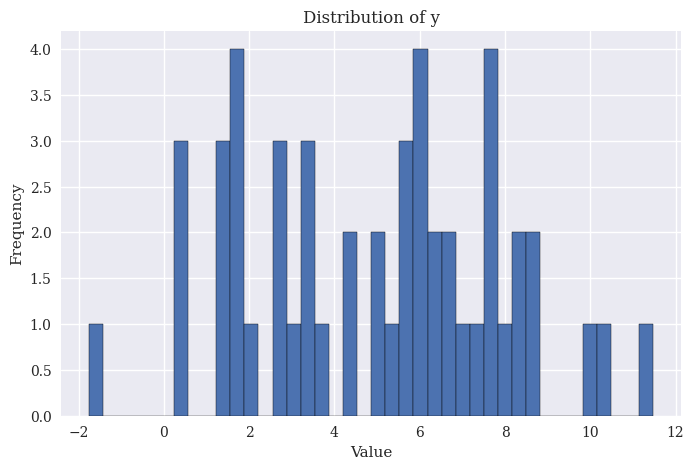

In [17]:
# just for demonstration purpose: a histogram of y
plt.figure(figsize=(8, 5))
plt.hist(y, bins=40, edgecolor='black')  # Changed to 20 bins
plt.title('Distribution of y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [20]:
# OLS regression of degree 1
reg = np.polyfit(x, y, deg=1)
reg # shows the optimal parameter values

array([0.94612934, 0.22855261])

#### <span style="color: green; line-height: 1.5;">__*Claude.ai*, is OLS regression the same as linear regression?__</span>

> OLS (Ordinary Least Squares) regression is a specific method of performing linear regression, so they are closely related but not exactly the same.
> 
> Here's a more detailed explanation:
> 
> Linear regression is a broader statistical approach used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.
> 
> OLS regression is the most common method of estimating the parameters (coefficients) in a linear regression model. It works by minimizing the sum of the squared vertical distances between the observed values and the predicted values from the linear model.
> 
> Key characteristics of OLS regression:
> - Finds the line of best fit by minimizing the squared residuals
> - Assumes a linear relationship between variables
> - Provides estimates for the coefficients that best explain the relationship
> - Commonly used when you want to predict a continuous outcome variable
> 
> In practice, when most people say "linear regression," they are typically referring to OLS regression. However, there are other methods for linear regression (like generalized least squares) that differ from OLS in how they estimate parameters.
> 
> A simple example in Python using statsmodels:
> 
> ```python
> import numpy as np
> import statsmodels.api as sm
> 
> # Create sample data
> X = np.random.rand(100, 1)
> y = 2 + 3 * X + np.random.randn(100, 1)
> 
> # Add a constant term for the intercept
> X = sm.add_constant(X)
> 
> # Fit OLS regression
> model = sm.OLS(y, X).fit()
> 
> # Print summary
> print(model.summary())
> ```
> 

#### <span style="color: green; line-height: 1.5;">__*Claude.ai*, in the context of the last question, can you please explain the numpy function np.polyfit(x, y, deg=1), with x being the independent and y being the dependent variable? I'm especially interested in the meaning of the degree parameter.__</span>

> Let me explain `np.polyfit()`:
> 
> `np.polyfit(x, y, deg=1)` is a NumPy function used to perform polynomial regression. It finds the coefficients of a polynomial that best fits the given data points.
> 
> Here's a breakdown:
> - `x`: Independent variable (input data)
> - `y`: Dependent variable (output data)
> - `deg`: The degree of the polynomial to fit
> 
> The degree parameter determines the complexity of the fitting polynomial:
> - `deg=1`: Linear regression (straight line)
> - `deg=2`: Quadratic regression (parabola)
> - `deg=3`: Cubic regression (S-shaped curve)
> - And so on...
> 
> Example:
> 
> ```python
> import numpy as np
> import matplotlib.pyplot as plt
> 
> # Linear fit (degree 1)
> x = np.array([1, 2, 3, 4, 5])
> y = np.array([2, 4, 5, 4, 5])
> 
> # Fit a 1st-degree polynomial (line)
> coeffs = np.polyfit(x, y, deg=1)
> # coeffs[0] is slope, coeffs[1] is y-intercept
> 
> # Quadratic fit (degree 2)
> quad_coeffs = np.polyfit(x, y, deg=2)
> 
> # Plot the original data and fits
> plt.scatter(x, y, label='Original Data')
> plt.plot(x, np.polyval(coeffs, x), color='red', label='Linear Fit')
> plt.plot(x, np.polyval(quad_coeffs, x), color='green', label='Quadratic Fit')
> plt.legend()
> plt.show()
> ```
> 
> The function returns an array of polynomial coefficients, ordered from highest degree to lowest. So for a linear fit (degree 1), it returns `[slope, intercept]`.
> 

#### <span style="color: green; line-height: 1.5;">__*Claude.ai*, what is polynomial regression?__</span>

> Polynomial regression is a form of regression analysis where the relationship between the independent variable x and the dependent variable y is modeled as an nth-degree polynomial. Unlike linear regression, which fits a straight line, polynomial regression can capture more complex, curved relationships between variables.
> 
> Basic concept:
> - Instead of a linear equation (y = mx + b)
> - Uses a polynomial equation (y = a0 + a1x + a2x² + a3x³ + ...)
> 
> Example comparison:
> - Linear regression: y = 2x + 3
> - Quadratic (degree 2): y = 2x² + 3x + 1
> - Cubic (degree 3): y = x³ + 2x² + 3x + 1
> 
> Practical illustration:
> ```python
> import numpy as np
> import matplotlib.pyplot as plt
> 
> # Generate some non-linear data
> x = np.linspace(0, 10, 100)
> y = 2 + 0.5 * x**2 + np.random.normal(0, 5, 100)
> 
> # Fit different degree polynomials
> linear_fit = np.polyfit(x, y, deg=1)
> quad_fit = np.polyfit(x, y, deg=2)
> cubic_fit = np.polyfit(x, y, deg=3)
> 
> # Plot original data and fits
> plt.scatter(x, y, label='Original Data')
> plt.plot(x, np.polyval(linear_fit, x), color='red', label='Linear Fit')
> plt.plot(x, np.polyval(quad_fit, x), color='green', label='Quadratic Fit')
> plt.plot(x, np.polyval(cubic_fit, x), color='blue', label='Cubic Fit')
> plt.legend()
> plt.show()
> ```
> 
> Use cases:
> - Modeling growth curves
> - Economic forecasting
> - Scientific data with non-linear relationships
> - Engineering and physics applications
> 
> Caution:
> - Higher degree polynomials can overfit
> - Always validate with test data
> - Choose the simplest model that explains the data well
> 

In [23]:
# okay, so far we've OLS regression of degree 1
reg # the optimal parameter values

array([0.94612934, 0.22855261])

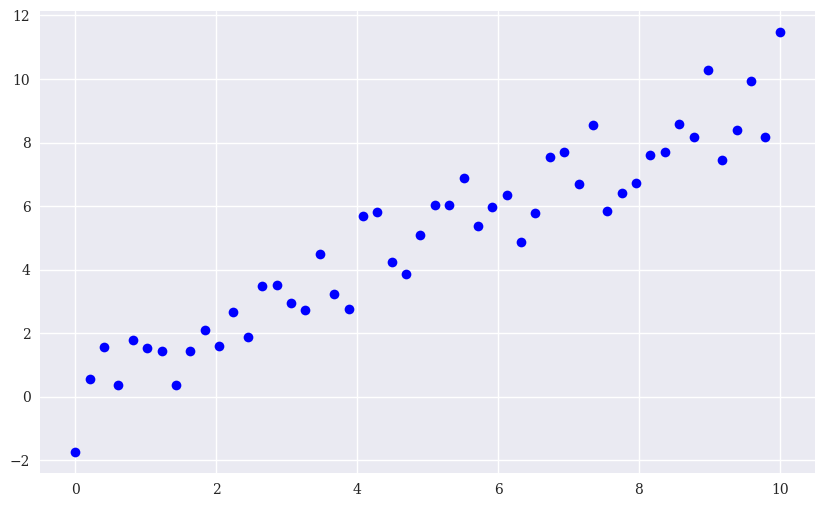

In [25]:
# let's create a figure plot out of this (8)
plt.figure(figsize=(10, 6))
# plotting the original data as dots (9)
plt.plot(x, y, 'bo', label='data')

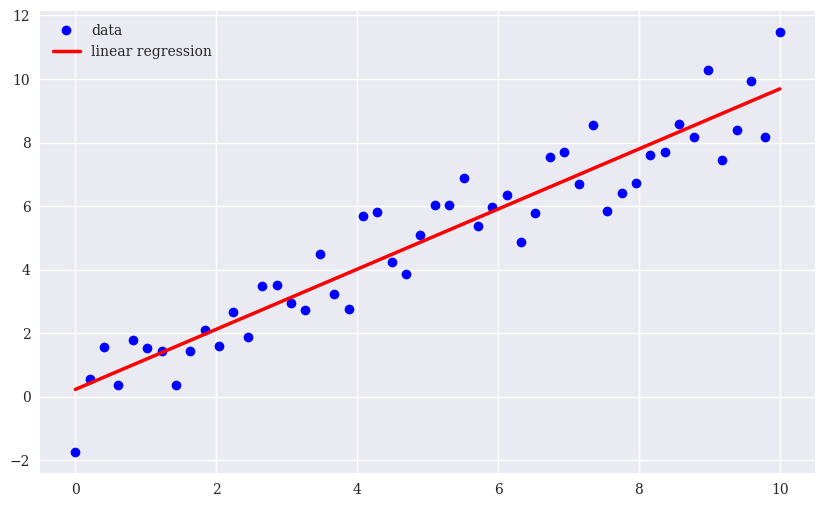

In [26]:
# let's create a figure plot out of this (8)
plt.figure(figsize=(10, 6))
# plotting the original data as dots (9)
plt.plot(x, y, 'bo', label='data')
# plotting the regression line (10)
plt.plot(x, np.polyval(reg, x), 'r', lw=2.5, label='linear regression')
# creating the legend (11)
plt.legend(loc=0)

The figure above shows __linear regression illustrated__ based on randomized data.

#### <span style="color: green; line-height: 1.5;">__*Claude.ai*, xxx?__</span>

> 